# PRACTICA 3: MACHINE LEARNING

>En aquesta pràctica se'ns demana entrenar varies models d'aprenentatge vists a classe per predir amb gran precisió el **tipus de coberta forestal** d'una mostra donada.
>El conjunt de dades de partida és el  *[Forest Cover Type Dataset](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/data)* , que conté 581013 mostres, cadascuna descrita per 54 atributs. Aquests atributs es detallaren més endavant. L'objectiu principal és poder classificar les mostres en set categories diferents.
>Els models a entrenar són els següents: el Perceptró, la Regressió logística, les Màquines de Vectors de Suport (SVM), els Arbres de Decisió i els Boscs Aleatories(Random Forest), tots ells disponibles a la llibreria *[Scikit-learn](https://scikit-learn.org/stable/)*.
>
>

# 1. Anàlisi exploratòria de dades


En aquesta secció durem a terme un anàlisi del nostre DATASET, explicarem en detall què
representa cada parametre, i a continucació visualitzarem el .

Primer de tot, importarem la llibreria pandas per poder llegir el nostre conjunt de dades

In [1]:
import pandas as pd

df = pd.read_csv("covtype.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'covtype.csv'

Ara podem visualitzar una parte del nostre conjunt de dades

In [137]:
df.head(20)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


Concretament els atributs que tenim són els següents

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Per tant, els paràmetres clau que podem identificar són els següents: l’elevació, l’aspecte, les distàncies horitzontal i vertical a la hidrologia, la distància horitzontal a les carreteres, la distància als punts de foc, l’ombra de muntanya a les 9 a.m., a les 3 p.m. i al migdia, així com quatre àrees salvatges (wilderness_area1, ..., wilderness_area4) en què pot estar present la coberta forestal, 40 tipus de sòls diferents, i el tipus de coberta (Cover_Type).

Des d’una altra perspectiva, els paràmetres es poden classificar en dues categories: els *multivalors*, que representen valors numèrics concrets associats a característiques específiques de la coberta forestal (com l’elevació, l’aspecte, les distàncies, l’ombra, etc.), i els *binaris*, que indiquen la presència (1) o l’absència (0) d’una característica en particular, com és el cas de les àrees salvatges i els tipus de sòl.


Aquesta classificació de paràmetres serà clau a l’hora de triar els hiperparàmetres per als nostres models d’aprenentatge.


Podem il·listrar aquesta diferencia de paràmetres en les següents taules

In [139]:
multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

In [140]:
df[multiValue_Columns]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


In [141]:
binari_columns= df.columns.difference(multiValue_Columns)
binari_columns= binari_columns.drop('Cover_Type')
df[binari_columns]

,Soil_Type1,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,...,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
581008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
581009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
581010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


A continuació, ...

In [142]:
df2= df.copy()

Ara intentarem assegurar que els rangs són raonables, és a dir, que els rangs del parametres binaris sigui 2 (poden prendre el valor 0 o 1), que el tipus de coberta (Cover_Type) tengui 7 valors diferents que correspon a les categories finals en les que classifiquarem el nostre conjunt de dades.

In [143]:
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

Verifiquarem que no tenim columnes amb valors nuls

In [144]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Per tant, observem que el nostre conjunt de dades és bastant net. No hi ha valors nuls, o valors que
no pertanyen al rang de dades de la seva columna.

Ara analitzarem la coherència de les nostres dades

In [145]:
df2.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Usant la matriu de correlació, visualitzarem la relació entre els atributs de les mostres.
Aquí només relacionarem les columnes de valor continu, ja que les columnes de sol o tipus no ofreixen, en aquest cas, cap informació.  

In [146]:
corr = df[multiValue_Columns].corr()

<Axes: >

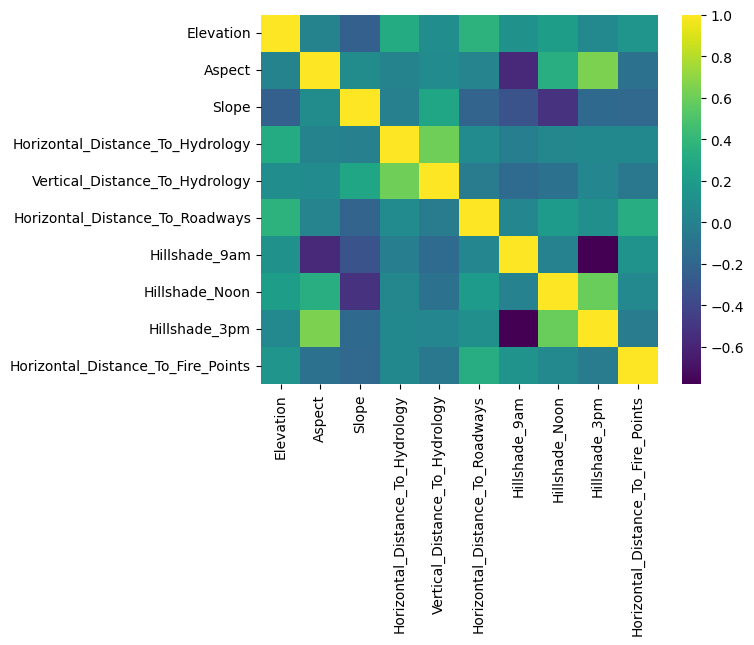

In [147]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='viridis')

És una mica díficil llegir la correlació de les columnes, per això ho visualitzarem en forma de taula

In [148]:
corr.style.background_gradient(cmap='coolwarm')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


Ara podem llegir millor els valors de correlació de la taula. Trobem per exemple que l'aspecte té una correlació positiva amb la columna HillShade_3pm. La distancia vertical a la hidrologia amb la horizontal, la sombra al migdia amb la sombra a les 3pm. 

Dibuixarem els histogramas per visualitzar els valors de les mostres, seguint amb el cas de columnes de valor continu

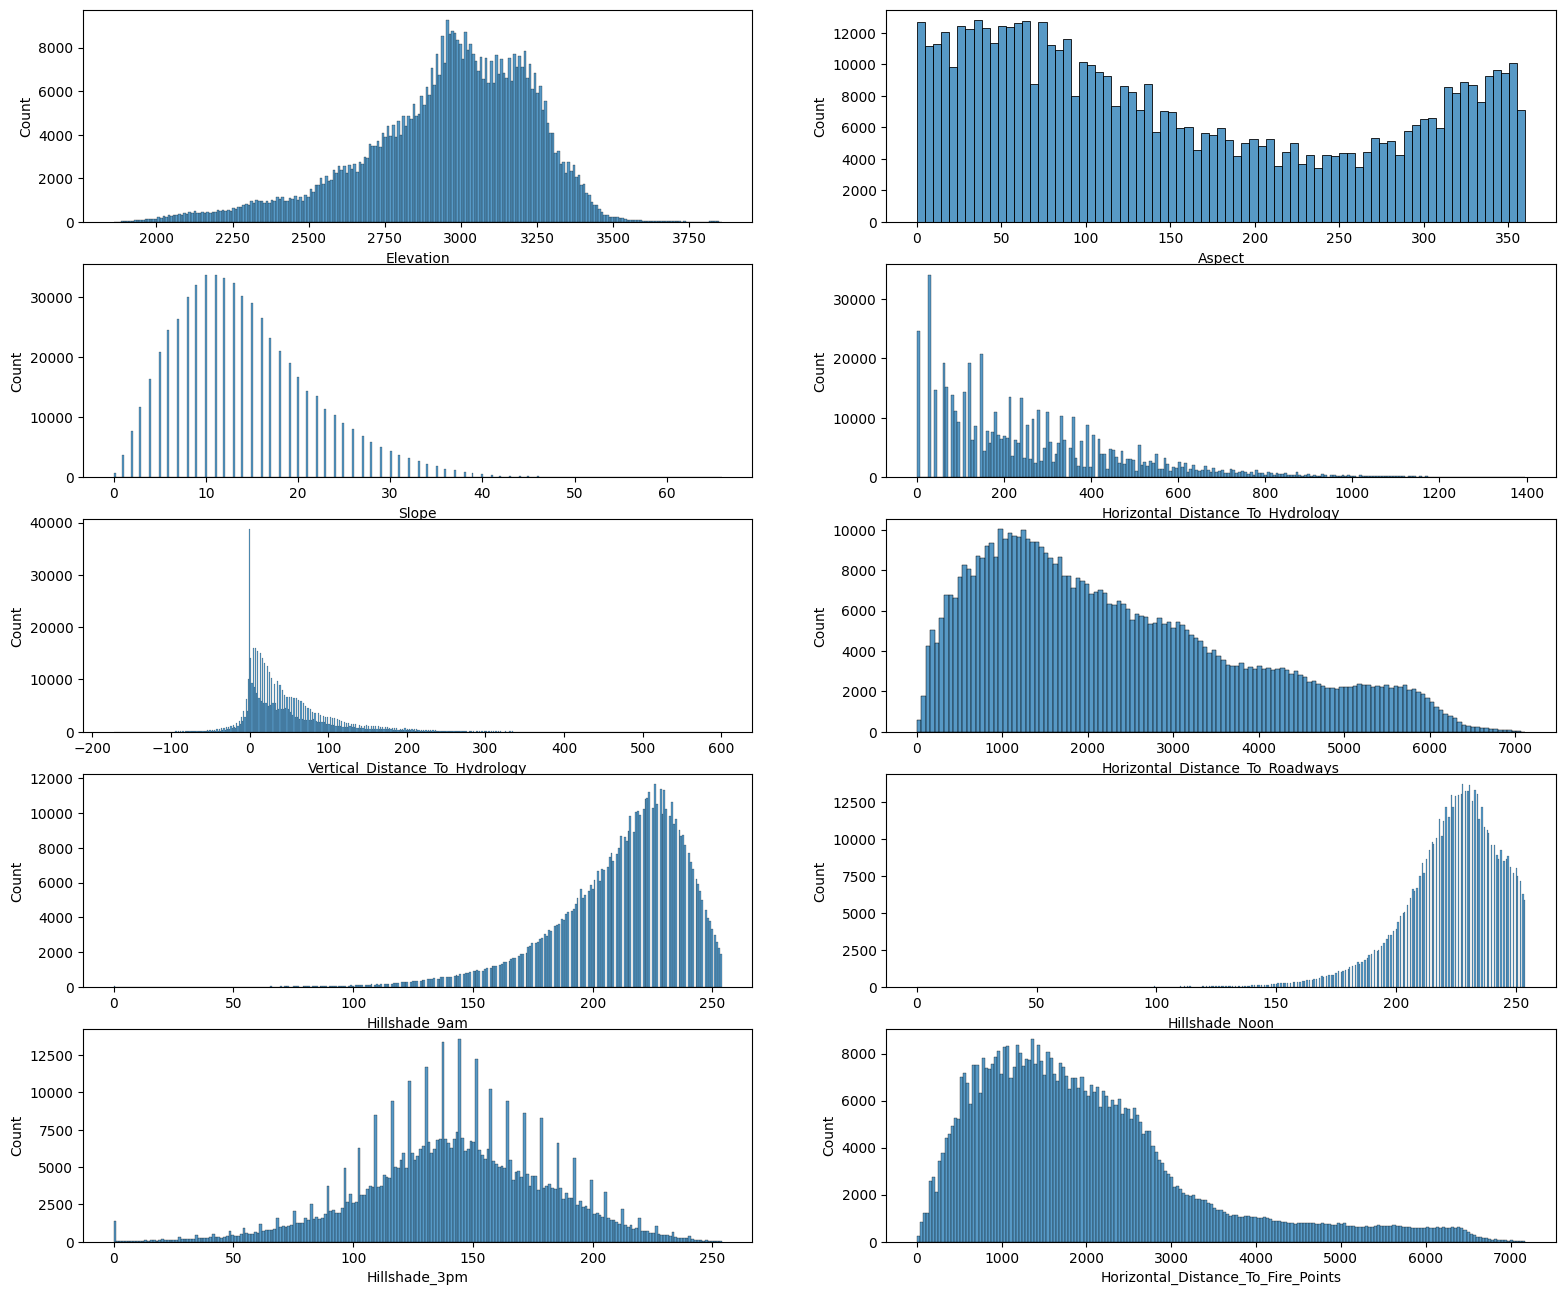

In [149]:
# histograms
import matplotlib.pyplot as plt

_, axes = plt.subplots(5, 2, figsize=(19, 16))

for ax, col in zip(axes.flatten(), multiValue_Columns):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_xlabel(col)

plt.show()

# 2. Perceptró

L'objectiu és trobar el tipus de coberta, doncs 'Cover_Type' és la principal característica que ens interessa ja que és la que ens demanen.

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Cover_Type'])  
y = df['Cover_Type'] 

Hem de dividir el conjunt de dades en entrenament i prova. Utilitzaré un percentatge de test d'un 33% com està en els exemples.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Hiperparàmetres

Una vegada dividit, hem de considerar si és necessari o no utilitzar hiperparàmetres. Per això, feim un GridSearch per a descobrir si hi ha millors paràmetros per a escollir que els que venen per defecte a cada model, en aquest cas, el Perceptró. Una vegada realitzada la cerca, es comparen resultats amb el model base (sense modificar res).

En aquest cas, els hiperparàmetres que havíem modificat eren alpha, max_iter i penalty. Alpha va sortir amb un valor diferent a l'establert per defecte, de 1e-5. En canvi, això comparat amb el model base ha obtingut els mateixos resultats i s'ha considerat no introduir aquests hiperparàmetres.

Aquests resultats han sigut els millors paràmetres pel model (no han sigut modificats de l'original).

In [ ]:
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

print(f"Parámetros del modelo base: ")
print(perceptron.get_params())

Parámetros del modelo base: 
{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Aquest utilitza l'alpha de 1e-4. Nosaltres havíem tret un alpha de 1e-5 amb els hiperparàmetres però han resultat insuficients per a tenir uns resultats molt parescuts.

## Mesures d'avaluació

Una vegada obtingut el model, s'han d'obtenir les mesures d'avaluació que millor convenen al perceptró i sobretot aquests resultats.

Primer mesurarem la precisió, amb la mètrica de accuracy_score de sklearn, que calcul·la el nombre de prediccions correctes respecte totes les prediccions. Serà una primera mesura que ens ajudarà molt a saber com de satisfactori ha resultat els hiperparàmetres trobats si és que han resultat positius.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predecir con el modelo base
y_pred = perceptron.predict(X_test)

accuracy_perc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo base: {accuracy_perc:.4f}")

Precisión del modelo base: 0.6042


S'ha obtingut una precisió del 60,42%, el qual no és un resultat del tot bo. El perceptró realitza una divisió lineal que divideix l'espai en dues característiques. En aquest cas hi ha set característiques del tipus de coberta (l'objectiu), el perceptró necessita utilitzar l'estrategia 'one VS rest' per a dividir l'espai en más multiclasses. També es pot deure a una falta d'hiperparàmetres, ya que s'ha intentado trobar-los però no s'ha aconseguit la manera de superar aquella precisió.

Ja que hem obtingut una precisió baixa, anam a utilizar la matriu de confusió per a veure a que es pot deure aquesta desviació.

La matriu de confusió té els valors correctes a la matriu diagonal. És a dir al valor i=1 j=1 hi ha els valors que han sigut predits com a classificació 1 i han sigut realment classificació 1, és a dir, que són correctes. Al valor i=1 j=2 hi ha els valors que han sigut predits com a classificació 2 i eren realment classificació 1. Així amb tots, així que quan més grossos siguin els valors diagonals i més petits siguin la resta de valors, més bó serà el model.

In [ ]:
conf_perc = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión del modelo base:")
print(conf_perc)

Matriz de Confusión del modelo base:
[[54377 15592     0     0     0     9     0]
 [32531 59768     0     0     0  1209    15]
 [    8  8935   195     0     0  2555     3]
 [    0   777    24     0     1    73     0]
 [  959  2164     0     0     0   102     0]
 [  182  4061     4     0     0  1515     0]
 [ 6348   327     0     0     0     0     0]]


La primera classe i la segona tenen molts de valors correctes. En canvi, a partir dels valors de la tercera classe els resultats es veuen clarament desfavorables, ja que prediuen incorrectament els valors de les classes 3,4,5,6 i 7.

Anem a representar-la en format mapa de calor

<Axes: >

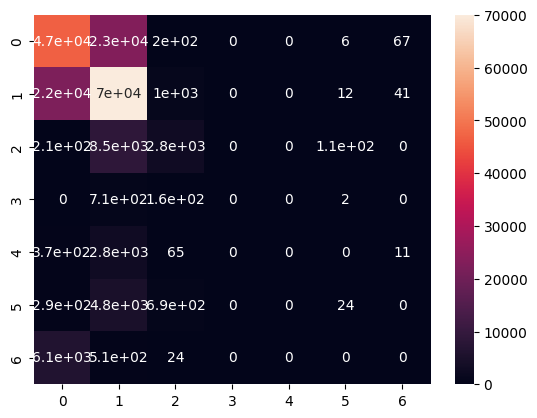

In [ ]:
sns.heatmap(conf_perc, annot=True)

Així es veu de manera més clara amb els tons dels diferents colors.

# 3. Regressió Logística

Ara passarem al model de regressió logística, per fer-ho, emplearem la divisió en entrenament i test, tal com hem fet al perceptró

In [219]:
from sklearn.linear_model import LogisticRegression

## Hiperparàmetres

Per fer-ho, emplearem un dels paràmetres més importants de la regressió logística, C, que control·la la força de la regulació del model. És a dir, quan més alt és aquest valor menys regularització hi ha, sent més flexible aquest model i quan més baix és aquest valor, més restringit serà. Per defecte, aquest valor val 1, així que provarem amb diferents valors al voltant d'aquest.

In [293]:
param_logregr = {
    'C': [0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter = 1000, random_state=42),
    param_grid=param_logregr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

Ara hem d'entrenar el model cercant la millor combinació possible d'aquest valor de regularització. Els warnings són perque el model no ha arribat a convergir abans del nombre d'iteracions però hem de posar un límit per qüestió de temps perque sino tardaria massa.

In [294]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [295]:
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'C': 0.01}


El millor hiperparàmetre ha resultat ser 0.01. Ara ja tenim el model millorat amb aquest hiperparàmetre utilitzat.

In [296]:
best_logregr = grid_search.best_estimator_

## Mesures d'avaluació

Ja tenim totes les característiques per a fer les prediccions. Ara analitzarem el resultat del model amb les mesures d'avaluació que més li convenen.

In [297]:
y_pred = best_logregr.predict(X_test)

accuracy_logregr = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo optimizado: {accuracy_logregr:.4f}")


Precisión del modelo optimizado: 0.6849


La precisió obtinguda és del 68,49%. És a dir, un 68,5% aproximadament de les vegades fa les prediccions correctes.

Ara mostrarem per primera vegada a un model l'informe de classificació, que mostra un gran resum dels resultats del model. La precisió mostra el % de prediccions positives de cada classificació, el recall indica tots els casos positius reals, f1-score és una mitjana entre la precisió i el recall, balanceja ambes mètriques. Support és el nombre de mostres que hi ha de cada classe. Accuracy (exactitud) calcul·la la proporció de prediccions correctes sobre el total de prediccions. Macro average indica la mitja aritmètica de les mètriques de cada classe, sense tenir en compte el nombre d'instàncies a cada classe. Weighted average calcul·la la mitja ponderada de les mètriques de cada classe, tenint en compte el tamany de cada classe.

In [ ]:
class_report_logregr = classification_report(y_test, y_pred)
print("Informe de Clasificación del modelo optimizado:")
print(class_report_logregr)

Informe de Clasificación del modelo optimizado:
              precision    recall  f1-score   support

           1       0.67      0.70      0.69     69978
           2       0.71      0.79      0.75     93523
           3       0.62      0.64      0.63     11696
           4       0.42      0.34      0.38       875
           5       0.00      0.00      0.00      3225
           6       0.23      0.03      0.05      5762
           7       0.49      0.03      0.06      6675

    accuracy                           0.68    191734
   macro avg       0.45      0.36      0.36    191734
weighted avg       0.65      0.68      0.66    191734



Tal com passava amb el perceptró, els primers nivells són els que més resultats correctes tenen. Aqui es suma amb bastant de correctes la tercera classificació amb valors un poc per a dalt del 60% de tot.

<Axes: >

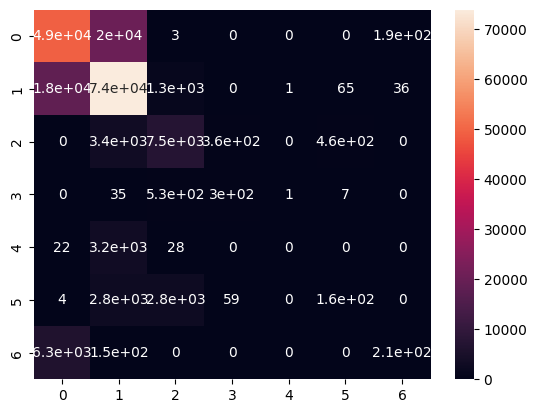

In [279]:
conf_logregr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_logregr, annot=True)

Com aquest resultat obtingut ha sigut millor que el model base ara farem una breu comparació amb el model base, que utilitza els paràmetres establerts per defecte.

In [298]:

base_logregr = LogisticRegression(random_state=42)
base_logregr.fit(X_train, y_train)

y_pred_base = base_logregr.predict(X_test)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Precisión del modelo base: {accuracy_base:.4f}")

Precisión del modelo base: 0.6228


La precisió del model base com podem veure ha sortit més baixa que la regressió logística que hem tret amb l'hiperparàmetre C millorat.

In [299]:
class_report_base = classification_report(y_test, y_pred_base, zero_division=1)
print("Informe de Clasificación del modelo base:")
print(class_report_base)

Informe de Clasificación del modelo base:
              precision    recall  f1-score   support

           1       0.61      0.66      0.64     69978
           2       0.63      0.75      0.69     93523
           3       0.57      0.24      0.34     11696
           4       1.00      0.00      0.00       875
           5       1.00      0.00      0.00      3225
           6       0.15      0.00      0.01      5762
           7       0.00      0.00      0.00      6675

    accuracy                           0.62    191734
   macro avg       0.57      0.24      0.24    191734
weighted avg       0.59      0.62      0.59    191734



Amb aquests valors de l'informe de classificació podem notar més la diferència ja que s'ha millorat amb totes les classificacions, excepte la quarta que és 0 a tots els llocs. En els valors generals de mitjana, també notam una lleugera diferència, aqui trobam valors més baixos (al model base) que al model que hem hiperparametritzat.

<Axes: >

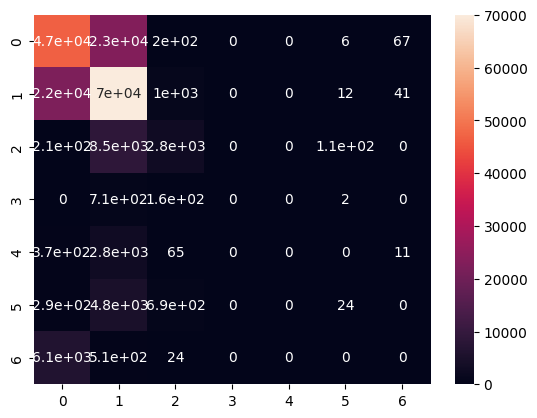

In [281]:
conf_matrix_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(conf_matrix_base, annot=True)

Aqui notam poques diferències respecte els colors, ja que canvien els valors, però no en gran quantitat, fent que es vegin els mateixos colors en el mapa de calor d'aquesta matriu de confusió.

# 4. Màquines de Vectors de Suport(SVM)

En aquesta secció parlarem amb detall de tots els hiperparametres del model SVM per entendre'n l'elecció i la selecció de valors.

>Aquest model, té els següents hiperparametres

Paràmetre| Descripció
|---------|--------------------|
|C|float, default=1.0. Paràmetre de regularització. Controla l'equilibri entre la complexitat del model i l'ajsut de les dades de l'entrenament. Un valor gran de C penalitza més errors, i redueix el marg i pot introduir underfitting. Per altra banda un valor petit de C permet més erros, i resulta en un marg més ample|
|kernel|{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’. Especifica el tipus de kernel que s'utilitzarà a l'algorisme. S'usa per calcular prèviament la matriu del nucle a partir de dades|
|degree|int, default=3 És el grau de la funció del nucli polimonial|
|gamma|{‘scale’, ‘auto’} or float, default=’scale’. Coeficient del nucli que controla l'abast d'infleuncia d'un únic punt d'entrenament dobre altres en el càlcul del kernel.Concretament, rgula com es mesura la similtud entre dos punts en l'espai d'entrada|
|coef|float, default=0.0. Terme independent que afecta a la forma dels kernels poly i sgimoid|
|shrinking|bool, default=True. Usar o no la heursitica de reducció. Es tracta d'accelerar l'entrenament del model reduint el número de punts de suport considerats en cada iteració de l'algorisme|
|probability|especifica si el model ha de calcular estimacions de probabilitat per les prediccions|
|tol|float, default=1e-3. Defineix la tolerància que l'algorisme utilitza com a criteri de convergència per aturar el procés d'optimització|
|cache_size|float, default=200. Tamnay de la caché del kernel (en MB)|
|class_weight|dict or ‘balanced’, default=None. Permet manejar datasets desbalancejats ajustant la importància relativa de cada classe|
|verbose|bool, default=False. Habilita la sortida detallada durant l'entrenament del model, proporcionant informació addicional sobre el progrés i els passos de l'algorisme|
|max_iter| int, default=-1. Controla el nombre màxim d'iteracions que l'algoritme pot fer durant el procés d'optimització, és a dir, durant l'ajustament del model a les dades d'entrenament. -1 és sense limite, és a dir, l'algorisme continua iterant fins que convergi|
|decision_function_shape|{‘ovo’, ‘ovr’}, default=’ovr’. Controla com s'estructura la sortida de la funció de decisió en classifació multicase|
|break_ties|bool, default=False. Controla com es manegein els casos d'empats en la predicció de clases en un model multiclasse|
|random_state|int, RandomState instance or None, default=None.Controla la generació de números pseudoaleatoris per barrejar les dades per a estimacions de probabilitat|

Ara bé, discutirem les opciones que triarem per trobar el millor valor de cada hiperparametre

Pel que fa al hiperparametre C, un major valor implica major penalització d'errors, redueix els margins i pot introduir underfitting. Per altra banda, un valor petit de C permet més erros, i resulta en un marg més ample.

Ara anem a reduir les dimesions del nostre conjunt de dades, usant la tecnica de PCA. En al llibreria sklearn ja tenim implementada aquesta tecnica usant PCA(n_components=x), on x és el número de dimesions que volem conservar. Per tant, cal primer discutir el valor que seleccionarem per la x abans d'aplicar el PCA. 
No hi ha una tecnica que assegura al 100% com triar o triar bé aquest valor, però es pot aplicar la següent heuristica. Traçar la variança i triar el valor que capta almenys el 95% de la variança. Graficament, mostrarem la variança i triarem el valor que compleix aqueix requisit.


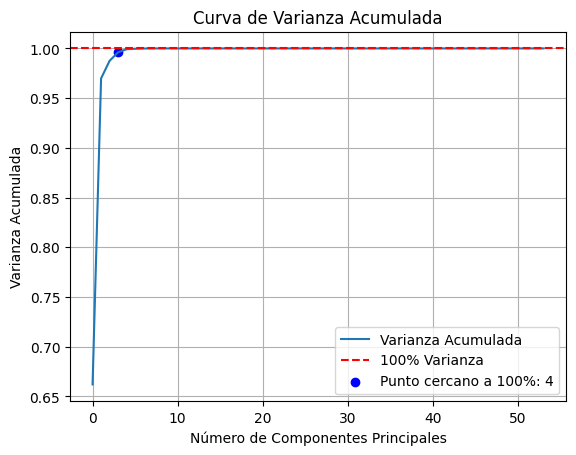

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Split dataset into training set and test set
# Labelling the data, based on the cover_type column
df2 = df.copy()
#df2 = df.sample(n=50000, random_state=42).copy()
features = df2.drop(columns=["Cover_Type"])
target = df2["Cover_Type"]
multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% training and 30% test


pca = PCA()
pca.fit(X_train)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
indice_cercano_a_1 = np.argmax(varianza_acumulada >= 0.99) 


# Graficar la curva
plt.plot(varianza_acumulada, label="Varianza Acumulada")
plt.axhline(y=1, color='r', linestyle='--', label="100% Varianza")
plt.scatter(indice_cercano_a_1, varianza_acumulada[indice_cercano_a_1], 
            color='blue', label=f'Punto cercano a 100%: {indice_cercano_a_1 + 1}')

# Etiquetas y leyenda
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Curva de Varianza Acumulada')
plt.legend()
plt.grid()
plt.show()


A la gràfica podem observar que a partir de 4 components ja podem aproximar la variança a un valor major encara que 95%!
Per tant el valor que prendrá el parametre n_components és 4.
Anem a aplicar el PCA al nostre conjunt de dades

Aquí també cal tenir en compte que abans d'usar el PCA hem d'escalar les nostres mostres, concretament aquelles que no són ja binaries. 

Una altra cosa a tenir en compte és la grandesa del nostre dataset. Aquest fet marca una gran diferencia a l'hora de fer l'entrenament. Per això, en lloc de provar per separat els valors adequats per cada hiperparametre, ho farem una vegada usant la tecnica de GridSearchCV que está inclosa en 
la llibreria sklearn.

In [ ]:
from sklearn.svm import SVC as svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import time


scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
# Escalar solo las columnas relevantes

X_train[multiValue_Columns] = X_train[multiValue_Columns].astype(float)
X_test[multiValue_Columns] = X_test[multiValue_Columns].astype(float)
multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]


#X_train[multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
#X_test[multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])

X_train.loc[:, multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
X_test.loc[:, multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])

#usar tots els nuclis
pca = PCA(n_components=indice_cercano_a_1+1, svd_solver = 'randomized') #el valor de l'index comença a 0
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


#determinar els millos valors del shiperaparametres
param_grid = {
    'C': [0.1, 1, 10, 1000],  # Valor de C
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipos de kernel
    #'gamma': ['scale', 'auto'],  # Valor de gamma
     'gamma': [0.001, 0.01, 0.1, 1]
}
model = svm()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)
 #Ver los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')
print(classification_report(y_test, grid_search.predict(X_test)), zero_division=0)






KeyboardInterrupt: 

Els millors parametres són 100 per C, 0.01 per gamma, i rbf pel kernel. Ara anem a entrenar el model amb aquests valors seleccionats

In [ ]:
from sklearn.svm import SVC as svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% training and 30% test

scaler = StandardScaler()

# Escalar solo las columnas relevantes
scaler_start_time = time.time()

X_train[multiValue_Columns] = X_train[multiValue_Columns].astype(float)
X_test[multiValue_Columns] = X_test[multiValue_Columns].astype(float)
multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]


#X_train[multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
#X_test[multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])

X_train.loc[:, multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
X_test.loc[:, multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])
scaler_end_time = time.time()
print(f"Tiempo de escalado: {scaler_end_time - scaler_start_time:.2f} segundos")

#usar tots els nuclis
pca_start_time = time.time()

pca = PCA(n_components=6, tol= 1e-4) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca_end_time = time.time()
print(f"Tiempo de PCA: {pca_end_time - pca_start_time:.2f} segundos")

model_start_time = time.time()

#model = svm(kernel='linear', C=1000, gamma= 0.01,  tol=1e-4 )
model = LinearSVC(C=1000, tol=1e-4)
model.fit(X_train, y_train)
model_end_time = time.time()
print(f"Tiempo de entrenamiento del modelo: {model_end_time - model_start_time:.2f} segundos")
prediction_start_time = time.time()

y_pred = model.predict(X_test)
prediction_end_time = time.time()
print(f"Tiempo de predicción: {prediction_end_time - prediction_start_time:.2f} segundos")

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, zero_division=0))





Tiempo de escalado: 0.32 segundos
Tiempo de PCA: 0.45 segundos
Tiempo de entrenamiento del modelo: 6.00 segundos
Tiempo de predicción: 0.02 segundos
Accuracy:  0.6424637415090876
Classification Report: 
               precision    recall  f1-score   support

           1       0.63      0.67      0.65     63556
           2       0.65      0.77      0.70     85078
           3       0.68      0.35      0.46     10638
           4       0.00      0.00      0.00       795
           5       0.00      0.00      0.00      2941
           6       0.10      0.00      0.00      5227
           7       0.95      0.03      0.05      6069

    accuracy                           0.64    174304
   macro avg       0.43      0.26      0.27    174304
weighted avg       0.62      0.64      0.61    174304



Donat que el millor tipus de kernel per al nostre dataset és rbf(radial basis Function), és a dir no lineal, la tecnica PCA assumeix que la distribució de les mostres és lineal, usarem altres tecniques:  LDA(Linear Discriminant Analysis), Isomap i MDS (Multi-Dimensional Slaing), per troba-ne la millor.


In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=109)  # 70% training and 30% test

scaler = StandardScaler()

# Escalar solo las columnas relevantes

X_train[multiValue_Columns] = X_train[multiValue_Columns].astype(float)
X_test[multiValue_Columns] = X_test[multiValue_Columns].astype(float)
multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]


#X_train[multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
#X_test[multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])

X_train.loc[:, multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
X_test.loc[:, multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])

# Aplicar LDA para reducir las dimensiones
lda = LDA(n_components=6)  # Número de componentes debe ser <= min(clases - 1, características)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Entrenar el modelo SVM con los datos transformados por LDA
#model = svm(kernel='rbf', C=1000, gamma=0.01, tol=1e-4)
model = LinearSVC(C=1000, tol=1e-4)

model.fit(X_train_lda, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_lda)

# Evaluar el rendimiento del modelo
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, zero_division=0))

Accuracy:  0.7037818982926382
Classification Report: 
               precision    recall  f1-score   support

           1       0.69      0.68      0.69     63550
           2       0.73      0.80      0.76     84884
           3       0.60      0.88      0.71     10720
           4       0.00      0.00      0.00       826
           5       0.50      0.02      0.03      2842
           6       0.40      0.02      0.04      5258
           7       0.65      0.32      0.43      6224

    accuracy                           0.70    174304
   macro avg       0.51      0.39      0.38    174304
weighted avg       0.69      0.70      0.68    174304



Ara notem que l'exactitud del model és major que la previa, corresponent al ús del PCA com a tecnica de redució.

Ara provem d'usar Isomap

In [ ]:
from sklearn.manifold import Isomap

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% training and 30% test

scaler = StandardScaler()

# Escalar solo las columnas relevantes

X_train[multiValue_Columns] = X_train[multiValue_Columns].astype(float)
X_test[multiValue_Columns] = X_test[multiValue_Columns].astype(float)

multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

X_train.loc[:, multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
X_test.loc[:, multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])
# Aplicar Isomap para reducir la dimensionalidad
isomap = Isomap(n_components=7)  # Reducir a 2 dimensiones, por ejemplo
X_train_isomap = isomap.fit_transform(X_train)
X_test_isomap = isomap.transform(X_test)

# Entrenar el modelo SVM
#svm_model = svm(kernel='rbf', C=1000, gamma=0.01)
model = LinearSVC(C=1000, tol=1e-4)

model.fit(X_train_isomap, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_isomap)

# Evaluar el modelo
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, zero_division=0))

i Ara amb MDS

In [ ]:
from sklearn.manifold import MDS

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% training and 30% test

scaler = StandardScaler()

# Escalar solo las columnas relevantes

X_train[multiValue_Columns] = X_train[multiValue_Columns].astype(float)
X_test[multiValue_Columns] = X_test[multiValue_Columns].astype(float)

multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

X_train.loc[:, multiValue_Columns] = scaler.fit_transform(X_train[multiValue_Columns])
X_test.loc[:, multiValue_Columns] = scaler.transform(X_test[multiValue_Columns])
# Aplicar Isomap para reducir la dimensionalidad
mds = MDS(n_components=5)  # Reducir a 2 dimensiones, por ejemplo
X_train_mds = mds.fit_transform(X_train)
X_test_mds = mds.fit_transform(X_test)

# Entrenar el modelo SVM
#svm_model = svm(kernel='rbf', C=1000, gamma=0.01)
model = LinearSVC(C=1000, tol=1e-4)

model.fit(X_train_mds, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_mds)

# Evaluar el modelo
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, zero_division=0))

MemoryError: Unable to allocate 1.20 TiB for an array with shape (406708, 406708) and data type float64

# 5. Arbres de Decisió

>Els hiperparameters dels models d'arbres de decisió són els següents

Hiperparàmetre|Descripció
|---------|--------------------|
|splitter|{“best”, “random”}, default=”best”. Defineix l'estratègia a usar per triar la divisió a cada node.|
|criterion | (str, default='gini'). Funció que mesura la qualitat d'una divisió. Els criteris admesos són "gini" i "log_loss|
|max_depth |(int o None, default=None). Profunditat màxima de cada arbre. Si s'estableix a None, els abres creixen completament, fins que tots els nodes siguin fulles pures o fins que es compleixin altres condicions|
|min_samples_split|int o float, default=2). Defineix el nombre mínim de mostres que han d'existir en un node perquè aquest es divideixi|
|min_samples_leaf | (int o float, default=1). Especifica el nombre mínim de mostres que ha de contenir un full perquè l'arbre pugui continuar dividint|
|min_weight_fraction_leaf |(float, default=0.0). Defineix la fracció mínima dels pesos de les mostres que ha de tenir un full per ser considerada a la divisió. És útil si tens mostres amb pesos desiguals|
|max_features |(int, float, str o None, default='sqrt'). Controla quantes característiques (o variables) s'han de considerar en dividir un node|
|max_leaf_nodes |(int o None, default=None). Estableix el número màxim de nodes fulla permesos en cada arbre|
|min_impurity_decrease |(float, default=0.0). El valor mínim de reducció de la impuresa requerit per dividir un node. Si la reducció en la impuresa és menor que aquest valor, no es fa la divisió|
|random_state | (int, RandomState o None, default=None). Estableix la llavor per al generador de números aleatoris. Això assegura que els resultats siguin reproduïbles|
|class_weight |(dict, list, str o None, default=None). Permet assignar pesos a les classes. Això és útil quan les classes estan desbalancejades (per exemple, algunes classes tenen moltes més mostres que altres). Es pot establir a "balanced" o "dict"|
|ccp_alpha |(float, default=0.0). Paràmetre de poda costosa per reduir la mida de l'arbre|
|monotonic_cst |(list of int, default=None). En problemes de regressió, es pot utilitzar aquest paràmetre per imposar restriccions monotòniques a les característiques|


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% training and 30% test

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# Evaluar el modelo
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, zero_division=0))

Accuracy:  0.9341323205434184
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93     63556
           2       0.94      0.94      0.94     85078
           3       0.92      0.93      0.93     10638
           4       0.84      0.82      0.83       795
           5       0.81      0.81      0.81      2941
           6       0.87      0.86      0.87      5227
           7       0.94      0.94      0.94      6069

    accuracy                           0.93    174304
   macro avg       0.90      0.89      0.89    174304
weighted avg       0.93      0.93      0.93    174304



# 6. Random Forest

>Els hiperparametres del random forest són els següents. A la taula només explicarem els que no apareixen a la taula previa del shiperaprametres dels arbres de decisió. 

Hiperparàmetre|Descripció
|---------|--------------------|
|n_estimators| (int, default=100) Número d'arbres de decisió del bosc|
|bootstrap |(bool, default=True). Si és True, es fa el mostreig amb reemplaçament de les mostres per entrenar cada arbre (bootstrap)|
|oob_score | (bool, default=False). Si és True, el model calcularà la puntuació Out-of-Bag (OOB), que és una estimació del rendiment del model utilitzant les mostres que no es van seleccionar durant l'entrenament de cada arbre|
|n_jobs| (int o None, default=None). El nombre de treballs (processos) a utilitzar per ajustar i predir el model de manera paral·lela. Si s'estableix a -1, s'utilitzaran tots els nuclis disponibles a la màquina|
|warm_start |(bool, default=False). Si és True, reutilitza els arbres del model anterior i els afegeix nous arbres en lloc d'entrenar un nou model des de zero|
|max_samples | (int o float, default=None). Nombre màxim de mostres que es faran servir per entrenar cada arbre quan bootstrap=True|


Anem a entrenar el nostre model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% training and 30% test

rfc= RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Evaluar el modelo
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, zero_division=0))

Accuracy:  0.9516132733614834
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.96      0.95     10638
           4       0.91      0.85      0.88       795
           5       0.94      0.75      0.84      2941
           6       0.93      0.89      0.91      5227
           7       0.97      0.95      0.96      6069

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304

